# **Linear Regression using Multiple Varible in Machine Learning**

Predicting the Premium of person based on Age , Weight & Height with help Pandas, SkLearn and Seaborn Libraries.

Learn from given YT video : https://www.youtube.com/watch?v=woSvDIF6QDY

*Always use small variable in excel also. it is easy to read.*

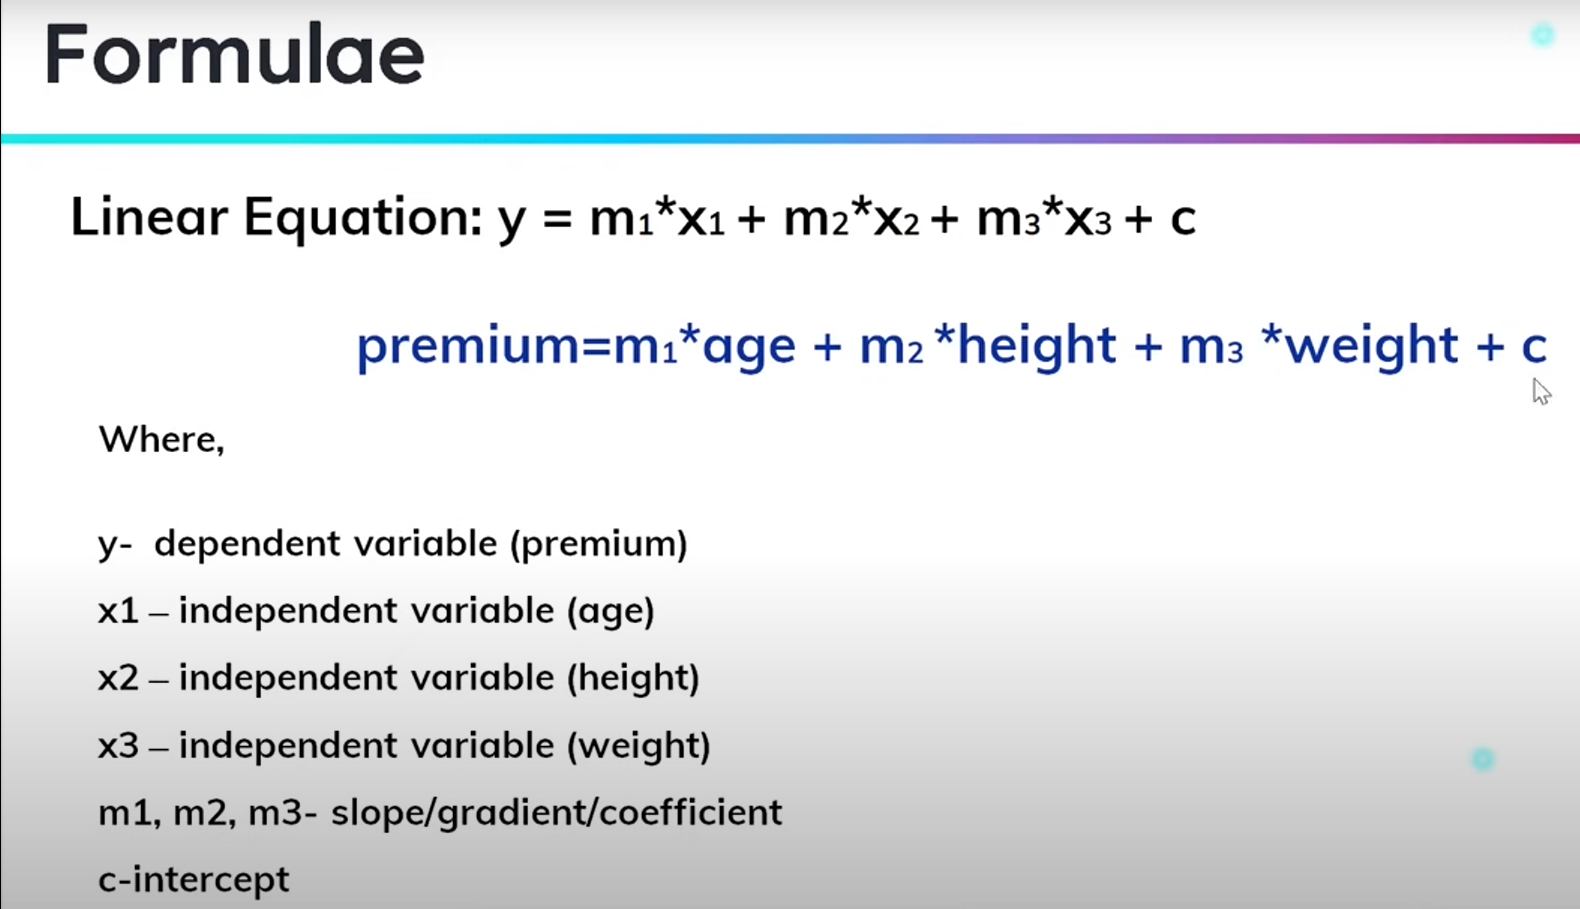

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv(r'D:\Coding\Learn_Python\Data\Insurance_Premeuim_Multi_Var.csv')
df

,age,height,weight,premium
0,25,162.56,70,18000
1,30,172.72,95,38000
2,35,167.64,78,38000
3,40,NaN,110,60000
4,45,157.48,85,70000


In this data, one value of height is missing. we can simply delete that row. because we have less data. So, we need to fill that empty cell with some statistical function like mean, median, mode, Varience and Standard Deviation many more like that.

In this case, Mean would be good to  go.

In [3]:
mean_height = df.height.mean()
mean_height

165.1

In [4]:
df.height

0    162.56
1    172.72
2    167.64
3       NaN
4    157.48
Name: height, dtype: float64

`fillna()` function will fill the mean value of height in all the empty cell. 

In [5]:
df.height.fillna(mean_height)


0    162.56
1    172.72
2    167.64
3    165.10
4    157.48
Name: height, dtype: float64

In [6]:
df

,age,height,weight,premium
0,25,162.56,70,18000
1,30,172.72,95,38000
2,35,167.64,78,38000
3,40,NaN,110,60000
4,45,157.48,85,70000


In [7]:
df.height = df.height.fillna(mean_height)

In [8]:
df

,age,height,weight,premium
0,25,162.56,70,18000
1,30,172.72,95,38000
2,35,167.64,78,38000
3,40,165.10,110,60000
4,45,157.48,85,70000


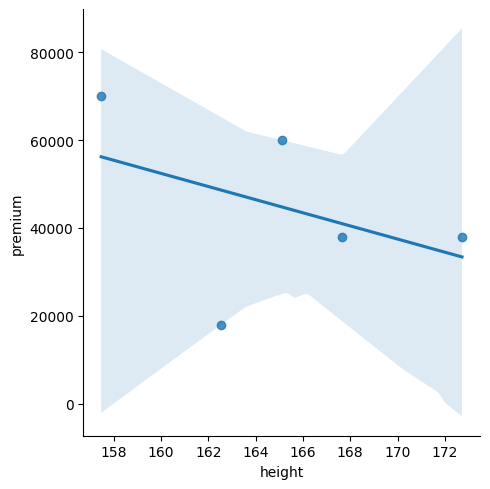

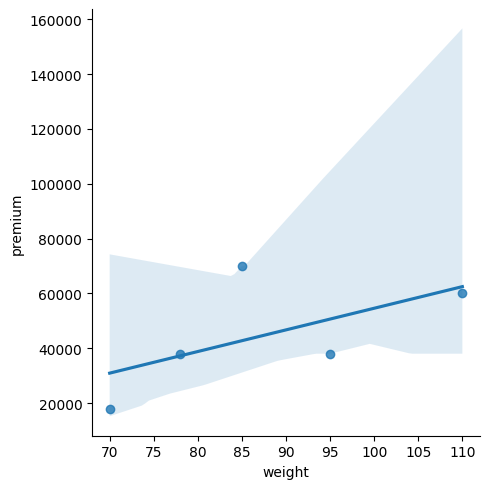

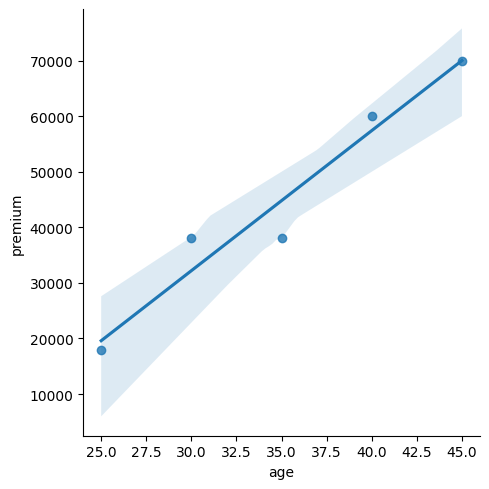

In [9]:
sns.lmplot(x="height", y="premium", data = df)
sns.lmplot(x="weight", y="premium", data = df)
sns.lmplot(x="age", y="premium", data = df)

Q. Can't we draw these 3 different plots on one single graph?

Ans: Yes we can. But firstly we need to find the value of weights belongs to each independend varible.

These weights are found based on Error, whose calculations are inbuilt in SkLearn library. we need to read document of SkLearn for that information.


In [10]:
reg = linear_model.LinearRegression()

In fit method, left side there should be independent varible while on the right side dependent varible.

In [11]:
reg.fit(df[["age","height","weight"]],df[["premium"]])

LinearRegression()

These m is nothing but weights for the equation which metions in top.

In [12]:
m = reg.coef_
m

array([[2150.26052416, -248.45851574,  312.65291961]])

This is the intercept of the best fit line which SkLearn's Linear regression model has been gave me.

In [13]:
c = reg.intercept_

Using Predict method, we can find out the aproximate value of premium based on data of age, height and weight.

In [14]:
y = reg.predict([[25,162.56,70]])
y

c:\Users\setu thacker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[18425.78800333]])

I have fetch the weight differently and do that same calculation manually for check purpose.

At the end, these both results are same. I have calculated the error in the end. you an refer that :)

In [15]:
y_ = m[0,0]*25 + m[0,1]*162.56 + m[0,2]*70 + c
y_

array([18425.78800333])

In [16]:
error = y - y_
error

array([[0.]])